## Visualization:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import h5py
from PIL import Image
import io
import os
import shutil


In [4]:
# Path to the extracted CSV file
metadata_path = "isic-2024-challenge/train-metadata.csv"

# Load the metadata into a pandas DataFrame
df = pd.read_csv(metadata_path)

# Display the first few rows
df.head()

C:\Users\TimPr\AppData\Local\Temp\ipykernel_2588\2240980110.py:5: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(metadata_path)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [5]:
# Display the first 5 rows of the dataset
df_head = df.head()

# Get basic metadata information
num_rows, num_cols = df.shape
column_names = df.columns.tolist()
missing_values = df.isnull().sum()
data_types = df.dtypes
unique_values = df.nunique()

# Print the information
print("First 5 rows of the dataset:")
print(df_head)
print("\nDataset Shape (Rows, Columns):", (num_rows, num_cols))
print("\nColumn Names:", column_names)
print("\nMissing Values per Column:")
print(missing_values)
print("\nData Types per Column:")
print(data_types)
print("\nNumber of Unique Values per Column:")
print(unique_values)

First 5 rows of the dataset:
        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1 

In [6]:
print(df.shape, df.columns, df['target'].value_counts(), df.isna().sum()) 

(401059, 55) Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mito

In [7]:
na_counts = df['iddx_full'].isna().groupby(df['target']).sum()
print(na_counts)


target
0    0
1    0
Name: iddx_full, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [9]:
# Impute missing values with mean for age_approx
df['age_approx'].fillna(df['age_approx'].mean(), inplace=True)

# Impute missing values with mode for sex and anatom_site_general
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['anatom_site_general'].fillna(df['anatom_site_general'].mode()[0], inplace=True)


C:\Users\TimPr\AppData\Local\Temp\ipykernel_2588\4047889070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_approx'].fillna(df['age_approx'].mean(), inplace=True)
C:\Users\TimPr\AppData\Local\Temp\ipykernel_2588\4047889070.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
df.iddx_full.unique()


array(['Benign',
       'Benign::Benign epidermal proliferations::Lichen planus like keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ',
       'Benign::Benign melanocytic proliferations::Nevus',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive',
       'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis',
       'Benign::Benign epidermal proliferations::Seborrheic keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial',
       'Indeterminate::Indeterminate melanocytic prol

In [11]:
import numpy as np

# Your original array
labels = np.array(['Benign',
       'Benign::Benign epidermal proliferations::Lichen planus like keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ',
       'Benign::Benign melanocytic proliferations::Nevus',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive',
       'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis',
       'Benign::Benign epidermal proliferations::Seborrheic keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial',
       'Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Dermal',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Lentigo maligna type',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma, NOS',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, associated with a nevus',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Infiltrating',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma',
       'Benign::Benign epidermal proliferations::Pigmented benign keratosis',
       'Benign::Benign epidermal proliferations::Solar lentigo',
       'Benign::Benign soft tissue proliferations - Fibro-histiocytic::Dermatofibroma',
       'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis::Actinic keratosis, Bowenoid',
       'Indeterminate::Indeterminate melanocytic proliferations::Atypical intraepithelial melanocytic proliferation',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Compound',
       'Benign::Cysts::Trichilemmal or isthmic-catagen or pilar cyst',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Superficial spreading',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Associated with a nevus',
       'Benign::Benign soft tissue proliferations - Fibro-histiocytic::Angiofibroma::Angiofibroma, Facial',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive::Squamous cell carcinoma, Invasive, Keratoacanthoma-type',
       'Benign::Benign soft tissue proliferations - Fibro-histiocytic::Scar',
       'Benign::Flat melanotic pigmentations - not melanocytic nevus::Lentigo NOS',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Deep penetrating',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Of special anatomic site',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma metastasis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Spitz',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ::Squamous cell carcinoma in situ, Bowens disease',
       'Benign::Inflammatory or infectious diseases::Verruca',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, NOS',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Combined',
       'Benign::Benign melanocytic proliferations::Nevus::Blue nevus::Blue nevus, Cellular',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, On chronically sun-exposed skin or lentigo maligna melanoma',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Congenital',
       'Benign::Benign soft tissue proliferations - Vascular::Hemangioma::Hemangioma, Cherry',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Superficial spreading',
       'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Nodular',
       'Benign::Cysts',
       'Benign::Benign adnexal epithelial proliferations - Apocrine or Eccrine::Hidradenoma',
       'Benign::Benign soft tissue proliferations - Fibro-histiocytic::Fibroepithelial polyp',
       'Benign::Benign adnexal epithelial proliferations - Follicular',
       'Benign::Benign epidermal proliferations::Seborrheic keratosis::Seborrheic keratosis, Clonal'])

# Create encoding dictionary
category_mapping = {
    'Benign': 'benign',
    'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ': 'Melanoma in situ',
    'Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive': 'Melanoma invasive',
    'Malignant::Malignant melanocytic proliferations (Melanoma)': 'Melanocytic proliferations (Melanoma)',
    'Malignant::Malignant adnexal epithelial proliferations - Follicular': 'Adnexal epithelial proliferations - Follicular (BCC)',
    'Malignant::Malignant epidermal proliferations': 'Epidermal proliferations (SCC)',
    'Indeterminate': 'Indeterminate',
    'Other': 'Other/NOS'
}

# Create the mapping function as previously discussed
def map_category(label):
    for key in category_mapping:
        if key in label:
            return category_mapping[key]
    return 'Other'

# Apply the mapping function to create the new feature
df['category'] = df['iddx_full'].apply(map_category)

In [12]:
# Reassign all target=0 samples in the 'Indeterminate' category to 'benign'
df.loc[(df['target'] == 0) & (df['category'] == 'Indeterminate'), 'category'] = 'benign'

# Check if all target=0 are in the 'benign' category
benign_check = df[df['target'] == 0]['category'].value_counts()
print("Target=0 in the benign category:")
print(benign_check)

# Check distribution of the categories for target=1 and others
category_check = df[df['target'] != 0]['category'].value_counts()
print("\nCategories distribution for target!=0:")
print(category_check)

# Check if all target=0 are in 'benign'
all_benign_for_target_0 = benign_check.get('benign', 0) == benign_check.sum()
print(f"\nAll target=0 are in 'benign': {all_benign_for_target_0}")


Target=0 in the benign category:
category
benign    400666
Name: count, dtype: int64

Categories distribution for target!=0:
category
Adnexal epithelial proliferations - Follicular (BCC)    163
Melanoma in situ                                         80
Epidermal proliferations (SCC)                           73
Melanoma invasive                                        63
Melanocytic proliferations (Melanoma)                    14
Name: count, dtype: int64

All target=0 are in 'benign': True


In [13]:
# List the columns to drop
columns_to_drop = ['image_type', 'tbp_lv_location', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'attribution', 'copyright_license', 'lesion_id']

# Drop specified columns
df_dropped = df.drop(columns=columns_to_drop)


# Dummy encode selected columns
columns_to_dummy = ['sex', 'anatom_site_general', 'tbp_lv_location_simple', 'category']
df_encoded = pd.get_dummies(df_dropped, columns=columns_to_dummy, drop_first=True)

# Check the resulting shape
print(df_encoded.shape)


(401059, 58)


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 58 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   isic_id                                         401059 non-null  object 
 1   target                                          401059 non-null  int64  
 2   patient_id                                      401059 non-null  object 
 3   age_approx                                      401059 non-null  float64
 4   clin_size_long_diam_mm                          401059 non-null  float64
 5   tbp_tile_type                                   401059 non-null  object 
 6   tbp_lv_A                                        401059 non-null  float64
 7   tbp_lv_Aext                                     401059 non-null  float64
 8   tbp_lv_B                                        401059 non-null  float64
 9   tbp_lv_Bext               

In [15]:
# Check for missing values
missing_values = df_encoded.isnull().sum()

# Print out the number of missing values per column
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [16]:
# Set 'isic_id' as the index
df_encoded.set_index('isic_id', inplace=True)


In [17]:
df.groupby('target')['patient_id'].nunique()


target
0    1041
1     259
Name: patient_id, dtype: int64

C:\Users\TimPr\AppData\Local\Temp\ipykernel_2588\445142067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_grouped = df[['age_approx', 'sex']].dropna().groupby(['sex', pd.cut(df['age_approx'], bins=10)]).size().unstack().T


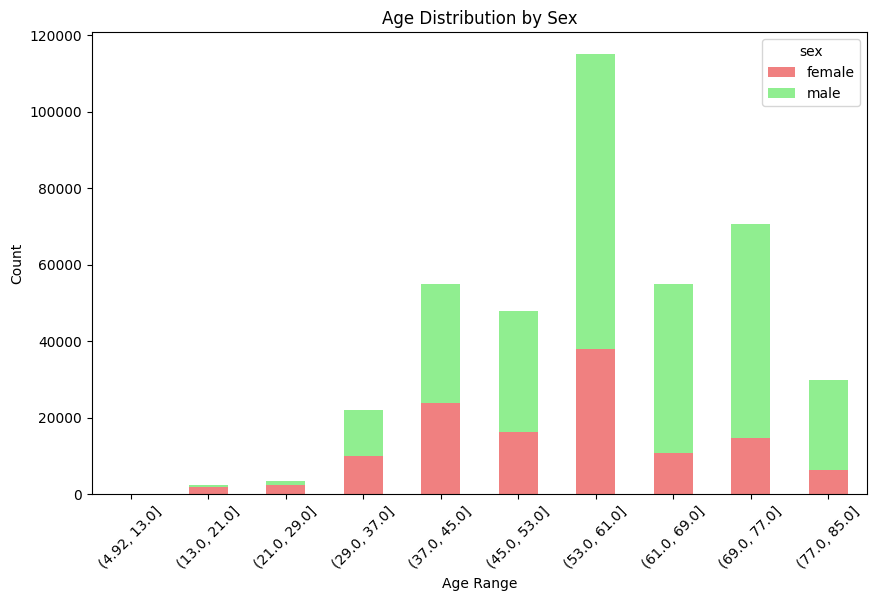

In [18]:
# Plot stacked age columns by sex
age_sex_grouped = df[['age_approx', 'sex']].dropna().groupby(['sex', pd.cut(df['age_approx'], bins=10)]).size().unstack().T

age_sex_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])
plt.title('Age Distribution by Sex')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


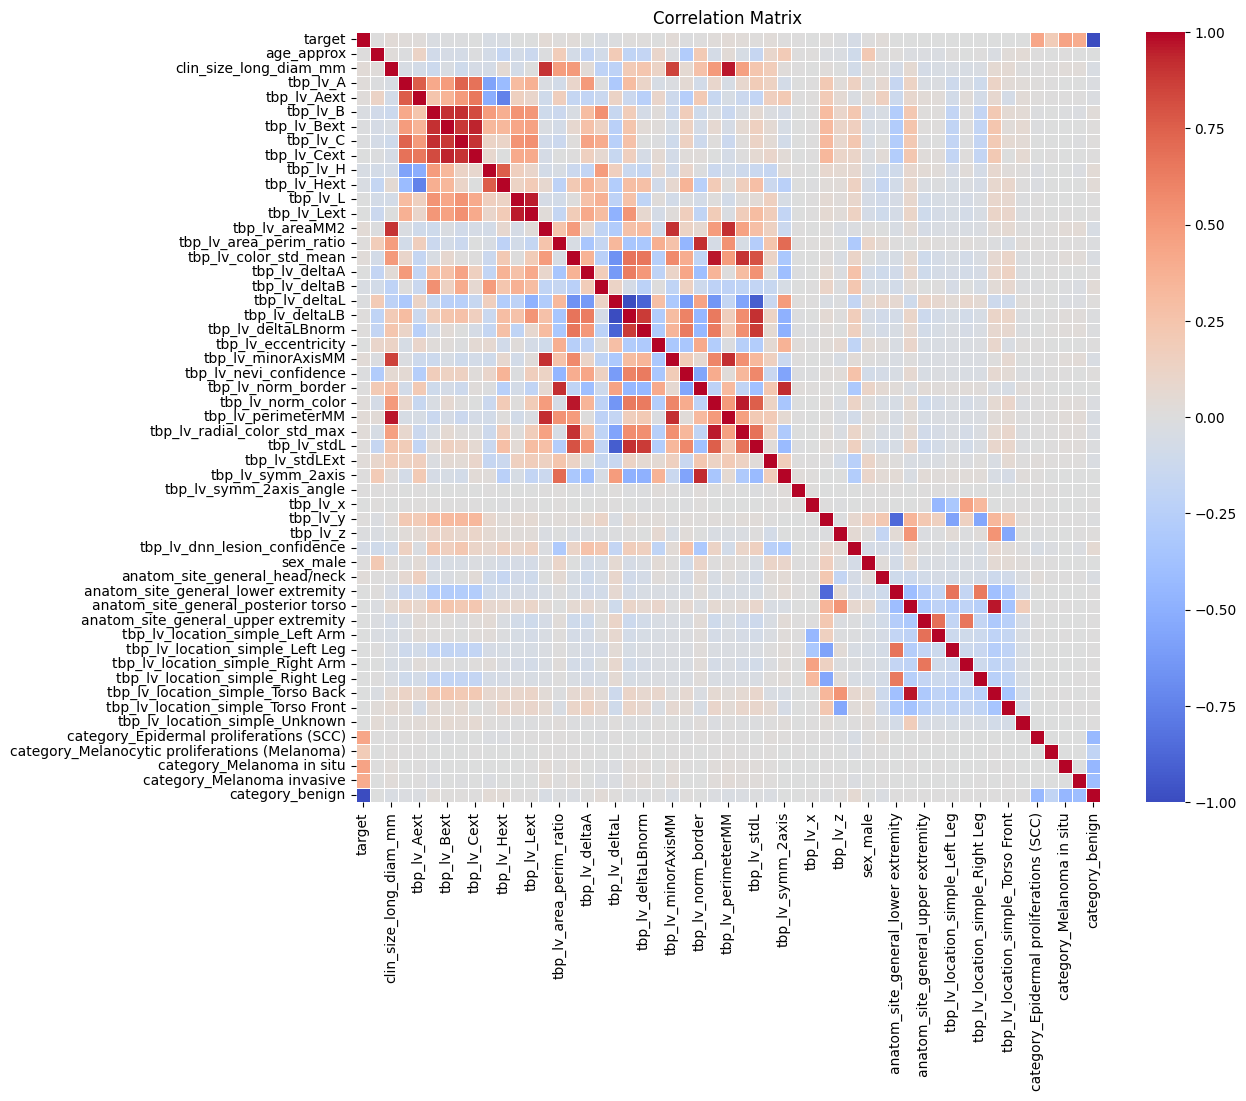

In [19]:
# Select only float and int columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [20]:
df_encoded.columns

Index(['target', 'patient_id', 'age_approx', 'clin_size_long_diam_mm',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence',
       'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'iddx_full', 'iddx_1', 'tbp_lv_dnn_lesion_confidence',
       'sex_male', 'anatom_site_general_head/neck',
       'anatom_site_general_lower extremity',
       'anatom_site_general_posterior torso',
       'anatom_site_general_upper extremity',
       'tbp_lv_lo

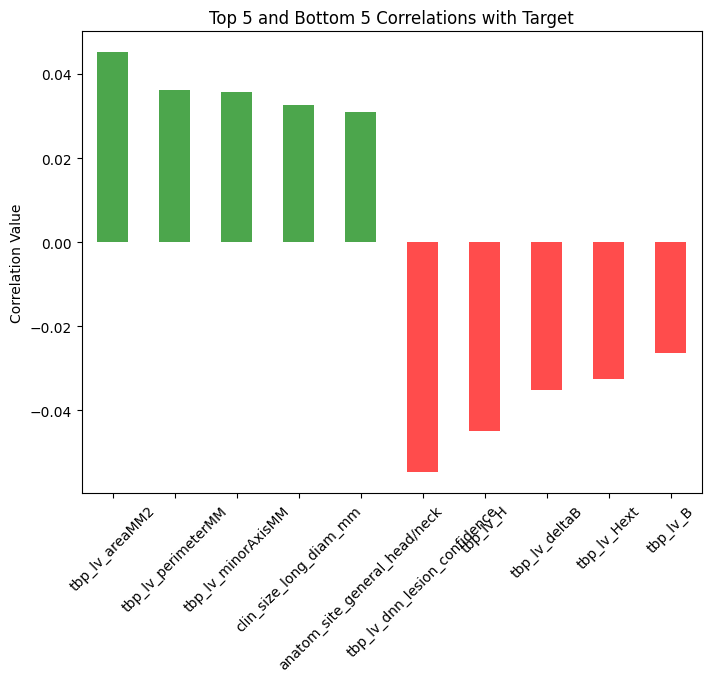

In [21]:
# Exclude the target's correlation with itself and specified categories
exclude_columns = ['target', 'category_Epidermal proliferations (SCC)', 
                   'category_Melanocytic proliferations (Melanoma)', 'category_Melanoma in situ', 
                   'category_Melanoma invasive', 'category_benign']

correlations_with_target = correlation_matrix['target'].drop(exclude_columns)


# Sort correlations and select the top 5 highest and lowest
top_5_corr = correlations_with_target.nlargest(5)
bottom_5_corr = correlations_with_target.nsmallest(5)

# Combine the top and bottom correlations
corr_to_plot = pd.concat([top_5_corr, bottom_5_corr])

# Plot the correlations
plt.figure(figsize=(8, 6))
corr_to_plot.plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr_to_plot], alpha=0.7)
plt.title('Top 5 and Bottom 5 Correlations with Target')
plt.ylabel('Correlation Value')
plt.xticks(rotation=45)
plt.show()



In [22]:
# Get the unique patient_ids where target == 1
unique_ids_target_1 = df_encoded[df_encoded['target'] == 1].index.unique()
unique_ids_target_0 = df_encoded[df_encoded['target'] == 0].index.unique()


In [23]:
unique_ids_target_0

Index(['ISIC_0015670', 'ISIC_0015845', 'ISIC_0015864', 'ISIC_0015902',
       'ISIC_0024200', 'ISIC_0035502', 'ISIC_0051648', 'ISIC_0051665',
       'ISIC_0051710', 'ISIC_0051758',
       ...
       'ISIC_9999817', 'ISIC_9999852', 'ISIC_9999854', 'ISIC_9999883',
       'ISIC_9999919', 'ISIC_9999937', 'ISIC_9999951', 'ISIC_9999960',
       'ISIC_9999964', 'ISIC_9999967'],
      dtype='object', name='isic_id', length=400666)

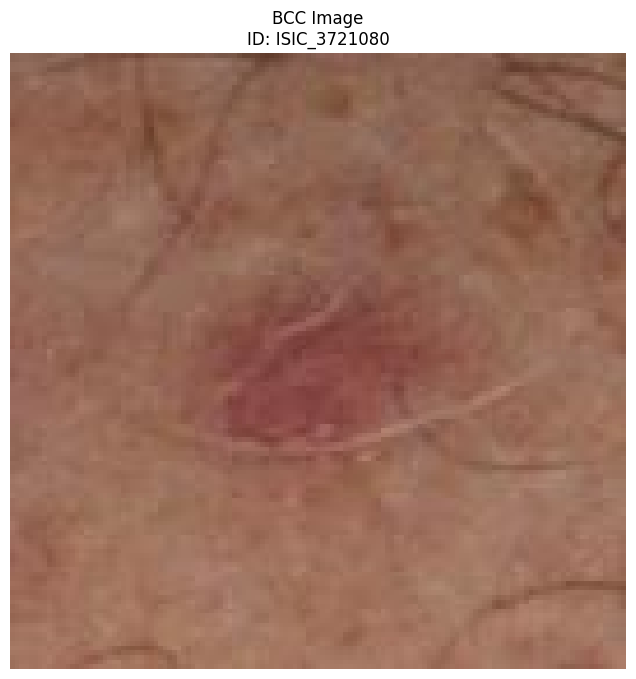

In [71]:
import random
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import io

# List of dummy-encoded category columns (keeping for structure)
category_columns = [
    'category_Epidermal proliferations (SCC)',
    'category_Melanocytic proliferations (Melanoma)',
    'category_Melanoma in situ',
    'category_Melanoma invasive',
    'category_benign'
]

# Get IDs for BCC (rows where all other categories are False)
bcc_ids = df_encoded[df_encoded[category_columns].sum(axis=1) == 0].index.unique()

# Randomly select one BCC ID
selected_bcc_id = random.choice(list(bcc_ids))

# Path to your HDF5 file
hdf5_path = "isic-2024-challenge/train-image.hdf5"

# Open the HDF5 file and display the image
with h5py.File(hdf5_path, 'r') as hdf:
    # Retrieve the raw binary data for the BCC image
    raw_image_data = hdf[str(selected_bcc_id)][()]
    
    # Decode the binary image using Pillow
    image = Image.open(io.BytesIO(raw_image_data))
    
    # Create a single plot
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"BCC Image\nID: {selected_bcc_id}")
    plt.show()

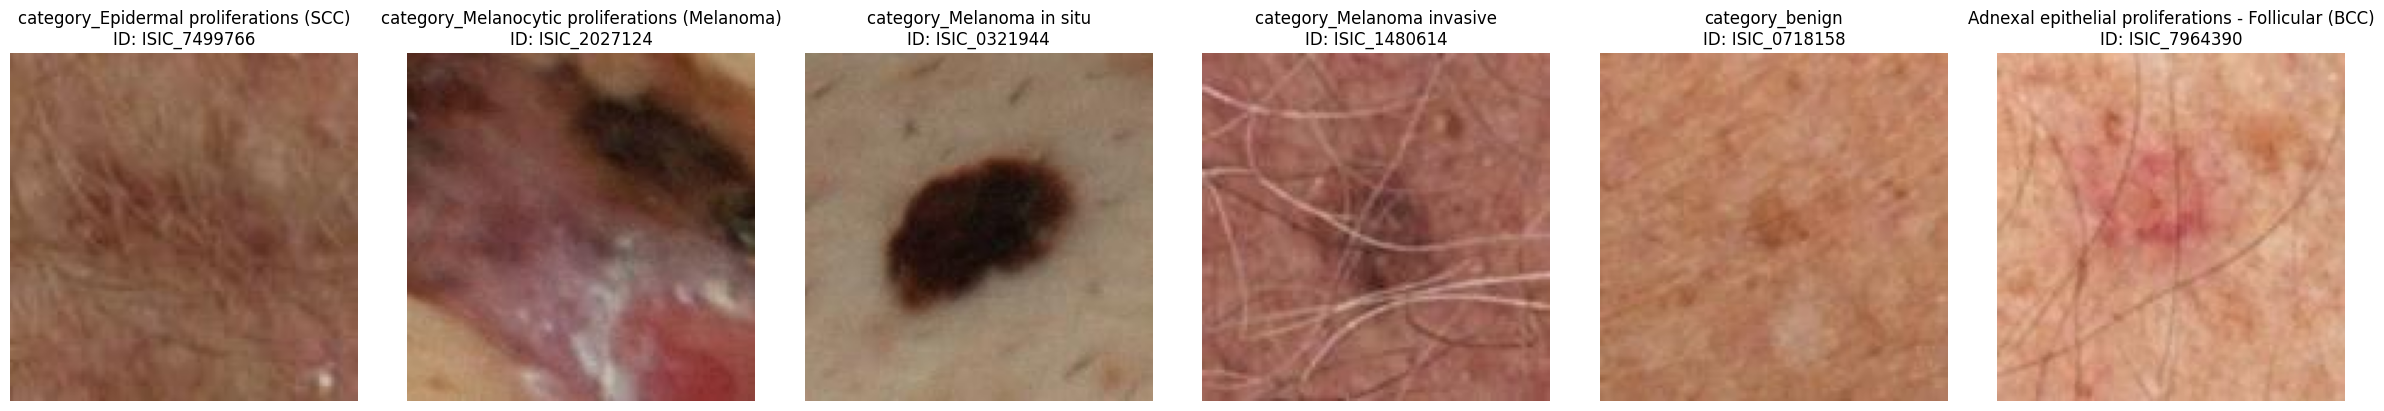

In [39]:
import random
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import io

# List of dummy-encoded category columns
category_columns = [
    'category_Epidermal proliferations (SCC)',
    'category_Melanocytic proliferations (Melanoma)',
    'category_Melanoma in situ',
    'category_Melanoma invasive',
    'category_benign'
]

# Dictionary to store unique IDs for each category
unique_ids_by_category = {}

# Get unique IDs for each category
for category in category_columns:
    # Filter rows where the category column is True
    unique_ids = df_encoded[df_encoded[category] == True].index.unique()
    unique_ids_by_category[category] = unique_ids

# Handle the implicit category: Adnexal epithelial proliferations - Follicular (BCC)
# Rows where all other category columns are False belong to this category
implicit_category = 'Adnexal epithelial proliferations - Follicular (BCC)'
implicit_ids = df_encoded[df_encoded[category_columns].sum(axis=1) == 0].index.unique()
unique_ids_by_category[implicit_category] = implicit_ids

# Randomly select one ID from each category
selected_ids = {}
for category, ids in unique_ids_by_category.items():
    if len(ids) > 0:  # Ensure there are IDs for the category
        selected_ids[category] = random.choice(list(ids))

# Path to your HDF5 file
hdf5_path = "isic-2024-challenge/train-image.hdf5"

# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf:
    # Set up the plotting grid (1 row, 6 columns)
    fig, axes = plt.subplots(1, 6, figsize=(24, 4))

    # Iterate over the selected IDs and display the images
    for i, (category, patient_id) in enumerate(selected_ids.items()):
        # Retrieve the raw binary data for the corresponding image
        raw_image_data = hdf[str(patient_id)][()]
        
        # Decode the binary image using Pillow
        image = Image.open(io.BytesIO(raw_image_data))
        
        # Determine the position in the subplot (1 row, 6 columns)
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')  # Hide axes for better visibility
        
        # Title: showing the category and patient ID
        ax.set_title(f"{category}\nID: {patient_id}")

    plt.tight_layout()
    plt.show()

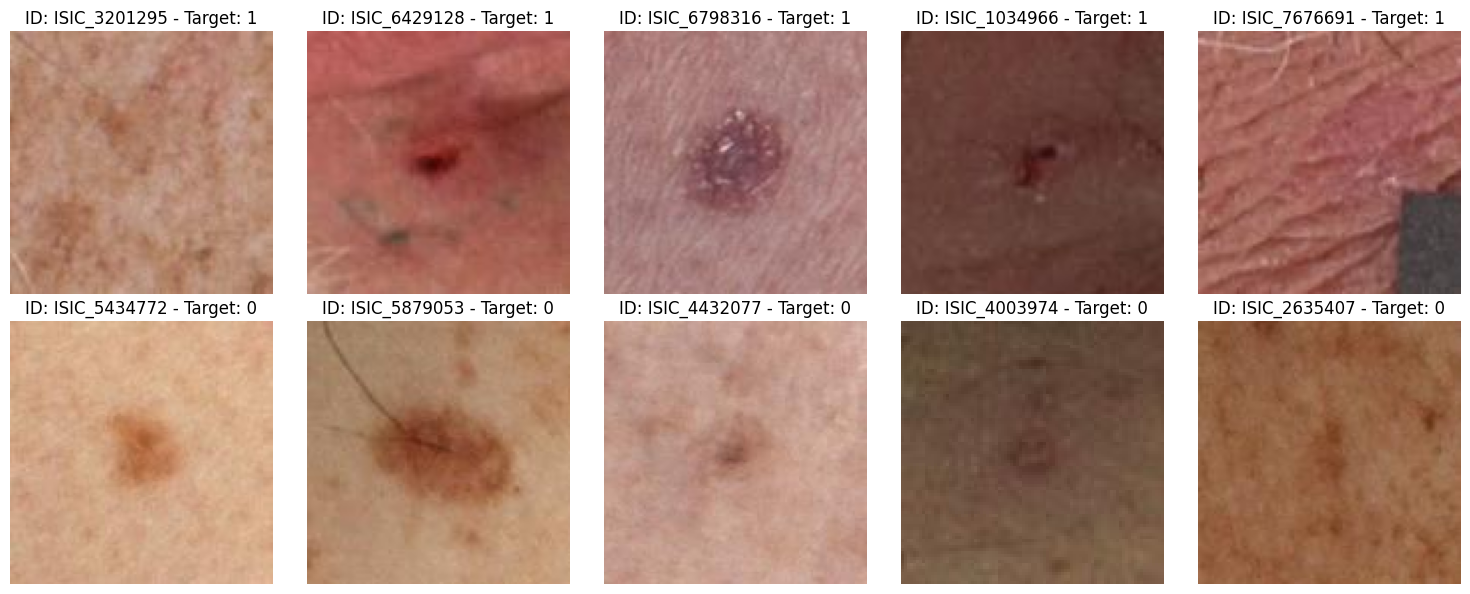

In [23]:
# Randomly select 5 ids from target_1 and target_0
target_1_ids = random.sample(list(unique_ids_target_1), 5)
target_0_ids = random.sample(list(unique_ids_target_0), 5)

# Path to your HDF5 file
hdf5_path = "isic-2024-challenge/train-image.hdf5"

# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf:
    # List all datasets in the file
    datasets = list(hdf.keys())

    # Set up the plotting grid (2 rows, 5 columns)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    # Iterate over target_1 and target_0 ids to display the images
    all_ids = target_1_ids + target_0_ids
    for i, patient_id in enumerate(all_ids):
        # Retrieve the raw binary data for the corresponding image
        raw_image_data = hdf[str(patient_id)][()]
        
        # Decode the binary image using Pillow
        image = Image.open(io.BytesIO(raw_image_data))
        
        # Determine the position in the subplot (2 rows, 5 columns)
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.axis('off')  # Hide axes for better visibility
        
        # Title: showing whether the target is 0 or 1
        ax.set_title(f"ID: {patient_id} - Target: {df_encoded.loc[patient_id, 'target']}")

    plt.tight_layout()
    plt.show()


First 5 rows of the dataset:
              target  patient_id  age_approx  clin_size_long_diam_mm  \
isic_id                                                                
ISIC_0015670       0  IP_1235828        60.0                    3.04   
ISIC_0015845       0  IP_8170065        60.0                    1.10   
ISIC_0015864       0  IP_6724798        60.0                    3.40   
ISIC_0015902       0  IP_4111386        65.0                    3.22   
ISIC_0024200       0  IP_8313778        55.0                    2.73   

             tbp_tile_type   tbp_lv_A  tbp_lv_Aext   tbp_lv_B  tbp_lv_Bext  \
isic_id                                                                      
ISIC_0015670     3D: white  20.244422    16.261975  26.922447    23.954773   
ISIC_0015845     3D: white  31.712570    25.364740  26.331000    24.549290   
ISIC_0015864        3D: XP  22.575830    17.128170  37.970460    33.485410   
ISIC_0015902        3D: XP  14.242329    12.164757  21.448144    21.121356  

In [25]:
df_encoded.to_csv('isic-2024-challenge/train-metadata-encoded.csv')

In [26]:
# # Define the path to your target_0 folder
# target_0_folder = "C:/Users/TimPr/allcode/Pytorch/kaggle_comp/isic-2024-challenge/train_folder/target_0/"

# # Make sure the target_0 folder exists, if not, create it
# os.makedirs(target_0_folder, exist_ok=True)

# # Randomly select 259*2 images from the target 0 list
# selected_target_0_ids = random.sample(list(unique_ids_target_0), 259 * 10)

# # Move the selected target 0 images to target_0 folder
# for image_id in selected_target_0_ids:
#     image_path = os.path.join(image_folder, f"{image_id}.jpg")
#     if os.path.exists(image_path):
#         shutil.move(image_path, os.path.join(target_0_folder, f"{image_id}.jpg"))
#     else:
#         print(f"Image {image_id}.jpg not found.")


['isic-2024-challenge-privateleaderboard-2025-02-06T16_29_34.csv']
   Rank    TeamId                   TeamName   LastSubmissionDate    Score  \
0     1  12470074           Ilya Novoselskiy  2024-09-06 13:13:17  0.17264   
1     2  12356241                   Yakiniku  2024-09-06 11:34:05  0.17243   
2     3  12424756                         KS  2024-09-05 23:18:44  0.17229   
3     4  12317877                  BiBanhBao  2024-09-04 15:51:19  0.17225   
4     5  12327282  Kanna Hashimoto friends 2  2024-09-06 12:54:14  0.17210   

   SubmissionCount                         TeamMemberUserNames  
0               67                                 ilya9711nov  
1              285            ozhiro,sh2967,shinaggle,tomoon33  
2               47                                     kyohei1  
3              124                                nguyenbadung  
4              131  fyk778,kannahashimoto,nynyny67,toseihatori  


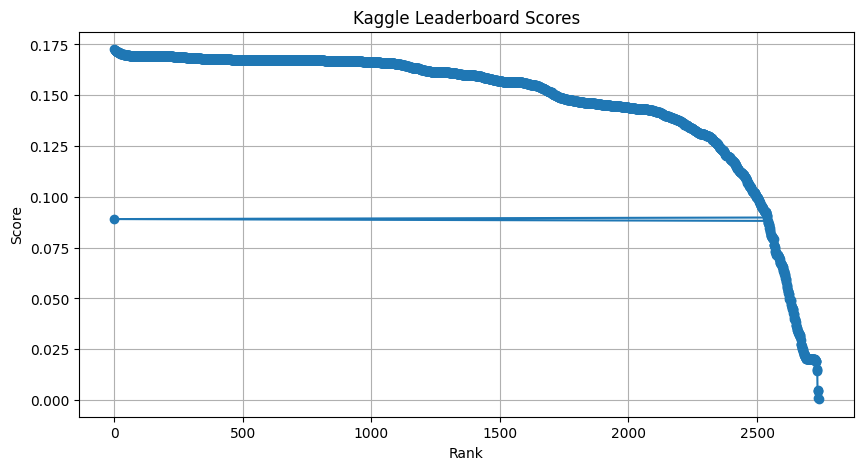

In [72]:
import pandas as pd
import zipfile
import os

# Path to the downloaded zip file
zip_path = r"C:\Users\TimPr\Downloads\isic-2024-challenge-privateleaderboard-2025-02-06T16_29_34.zip"

# Extract the files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    extract_path = os.path.splitext(zip_path)[0]  # Remove .zip extension
    zip_ref.extractall(extract_path)

# Check extracted files
files = os.listdir(extract_path)
print(files)  # Look for CSV or JSON file

# Load the leaderboard CSV (if exists)
leaderboard_file = [f for f in files if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, leaderboard_file))

# Display basic info
print(df.head())

# Visualize scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["Rank"], df["Score"], marker="o", linestyle="-")
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("Kaggle Leaderboard Scores")
plt.grid()
plt.show()
